# WeatherPy
----

#### Author: Joey Picca

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [21]:
ci, country, lat, lon, date, temp, humidity, cloud, wind = [],[],[],[],[],[],[],[],[]

base_url = "https://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

print('Beginning data retrieval')
print('------------------------')

for idx,city in enumerate(cities):

    city = city

    url = f'{base_url}q={city}&units={units}&APPID={weather_api_key}'

    try:
        response = requests.get(url)

        ci.append(response.json()['name'])
        country.append(response.json()['sys']['country'])
        lat.append(response.json()['coord']['lat'])
        lon.append(response.json()['coord']['lon'])
        date.append(response.json()['dt'])
        temp.append(response.json()['main']['temp_max'])
        humidity.append(response.json()['main']['humidity'])
        cloud.append(response.json()['clouds']['all'])
        wind.append(response.json()['wind']['speed'])

        print(f'Gathered weather data for City #{idx+1}: {city}')
    except:
        print('City not found! Stop looking in the boonies!')


Beginning data retrieval
------------------------
Gathered weather data for City #1: qingdao
City not found! Stop looking in the boonies!
Gathered weather data for City #3: narsaq
Gathered weather data for City #4: bredasdorp
City not found! Stop looking in the boonies!
City not found! Stop looking in the boonies!
Gathered weather data for City #7: buraydah
Gathered weather data for City #8: rikitea
Gathered weather data for City #9: chokurdakh
Gathered weather data for City #10: la ronge
Gathered weather data for City #11: sabzevar
Gathered weather data for City #12: punta arenas
Gathered weather data for City #13: lloydminster
City not found! Stop looking in the boonies!
Gathered weather data for City #15: morondava
Gathered weather data for City #16: kapaa
Gathered weather data for City #17: cayenne
Gathered weather data for City #18: iskateley
Gathered weather data for City #19: saskylakh
Gathered weather data for City #20: ushuaia
Gathered weather data for City #21: san quintin
Ga

Gathered weather data for City #179: hofn
Gathered weather data for City #180: kopervik
Gathered weather data for City #181: bilma
Gathered weather data for City #182: carmarthen
Gathered weather data for City #183: zapolyarnyy
Gathered weather data for City #184: gallipoli
Gathered weather data for City #185: nishihara
Gathered weather data for City #186: faanui
Gathered weather data for City #187: vung tau
Gathered weather data for City #188: bethel
Gathered weather data for City #189: tineo
Gathered weather data for City #190: lagoa
Gathered weather data for City #191: bambous virieux
Gathered weather data for City #192: mexico
Gathered weather data for City #193: nelson bay
Gathered weather data for City #194: luganville
Gathered weather data for City #195: kalmunai
Gathered weather data for City #196: tuktoyaktuk
Gathered weather data for City #197: gisborne
Gathered weather data for City #198: kem
City not found! Stop looking in the boonies!
Gathered weather data for City #200: r

Gathered weather data for City #358: konitsa
Gathered weather data for City #359: sorland
Gathered weather data for City #360: kang
Gathered weather data for City #361: krasnyy chikoy
Gathered weather data for City #362: cerrito
Gathered weather data for City #363: burnie
Gathered weather data for City #364: faya
Gathered weather data for City #365: serebryansk
Gathered weather data for City #366: cusuna
Gathered weather data for City #367: meulaboh
Gathered weather data for City #368: verkhoyansk
Gathered weather data for City #369: camocim
City not found! Stop looking in the boonies!
Gathered weather data for City #371: lasa
Gathered weather data for City #372: madras
Gathered weather data for City #373: vila praia de ancora
Gathered weather data for City #374: katherine
City not found! Stop looking in the boonies!
Gathered weather data for City #376: holme
Gathered weather data for City #377: hervey bay
Gathered weather data for City #378: hasaki
Gathered weather data for City #379:

Gathered weather data for City #536: kobayashi
Gathered weather data for City #537: pochutla
Gathered weather data for City #538: doha
Gathered weather data for City #539: soe
Gathered weather data for City #540: mogadouro
Gathered weather data for City #541: romans-sur-isere
Gathered weather data for City #542: bagrami
City not found! Stop looking in the boonies!
Gathered weather data for City #544: port augusta
Gathered weather data for City #545: resistencia
Gathered weather data for City #546: bonnyville
City not found! Stop looking in the boonies!
Gathered weather data for City #548: tazovskiy
Gathered weather data for City #549: cay
Gathered weather data for City #550: martapura
Gathered weather data for City #551: tahta
City not found! Stop looking in the boonies!
Gathered weather data for City #553: constitucion
Gathered weather data for City #554: banjarmasin
Gathered weather data for City #555: lavrentiya
Gathered weather data for City #556: buluan
Gathered weather data for C

In [17]:
response.json()

{'coord': {'lon': 120.37, 'lat': 36.1},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 43.32,
  'feels_like': 37.85,
  'temp_min': 42.01,
  'temp_max': 45,
  'pressure': 1025,
  'humidity': 75},
 'visibility': 10000,
 'wind': {'speed': 4.47, 'deg': 150},
 'rain': {'3h': 0.25},
 'clouds': {'all': 100},
 'dt': 1579627571,
 'sys': {'type': 1,
  'id': 9657,
  'country': 'CN',
  'sunrise': 1579647976,
  'sunset': 1579684383},
 'timezone': 28800,
 'id': 1797929,
 'name': 'Qingdao',
 'cod': 200}

In [22]:
weatherDF = pd.DataFrame({'City':ci,'Country':country,'lat(deg)':lat,'lon(deg)':lon,'Date':date,
                          'temp(f)':temp,'humidity(%)':humidity,'cloudcover(%)':cloud,'wind(mph)':wind})

In [8]:
# Grab one of the unix times and make a timestamp string that's friendlier on the eyes

year = time.gmtime(weatherDF.iloc[0,4])[0]
month = time.gmtime(weatherDF.iloc[0,4])[1]
day = time.gmtime(weatherDF.iloc[0,4])[2]

formattedDate = f'{month}/{day}/{year}'

In [31]:
weatherDF.to_csv('../output_data/wxdata.csv',index=False)

#### Use the cell below if we just want to re-load already downloaded/formatted data

In [5]:
weatherDF = pd.read_csv('../output_data/wxdata.csv')

In [10]:
plt.rcParams['axes.grid'] = True

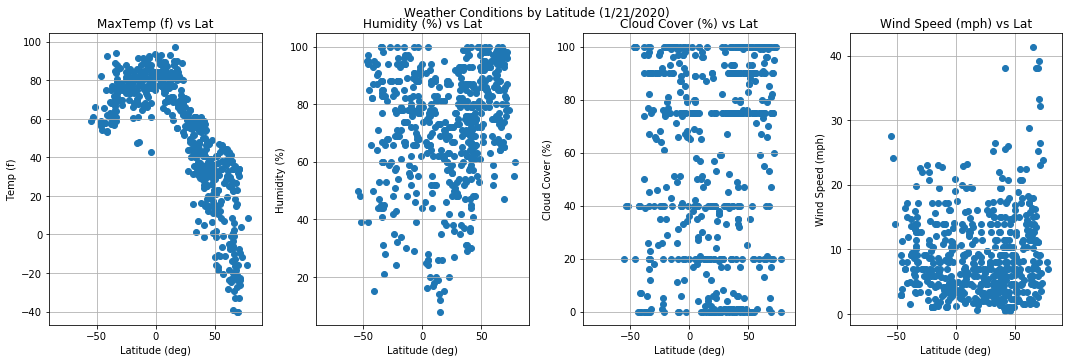

In [32]:
fig, axs = plt.subplots(1, 4, figsize=(15, 5), subplot_kw=dict(xlim=[-90,90], xlabel='Latitude (deg)'))

axs[0].scatter(weatherDF['lat(deg)'],weatherDF['temp(f)'])
axs[0].set_title('MaxTemp (f) vs Lat')
axs[0].set_ylabel('Temp (f)')
axs[0].set_xlabel('Latitude (deg)')

axs[1].scatter(weatherDF['lat(deg)'],weatherDF['humidity(%)'])
axs[1].set_title('Humidity (%) vs Lat')
axs[1].set_ylabel('Humidity (%)')

axs[2].scatter(weatherDF['lat(deg)'],weatherDF['cloudcover(%)'])
axs[2].set_title('Cloud Cover (%) vs Lat')
axs[2].set_ylabel('Cloud Cover (%)')

axs[3].scatter(weatherDF['lat(deg)'],weatherDF['wind(mph)'])
axs[3].set_title('Wind Speed (mph) vs Lat')
axs[3].set_ylabel('Wind Speed (mph)')

fig.suptitle(f'Weather Conditions by Latitude ({formattedDate})',y=1)
plt.tight_layout()
plt.savefig('../output_data/WxByLat.png',dpi=300)
plt.show()

The instructions said to make a scatterplot for each variable (max temp, humidity, cloud cover, and wind speed) vs latitude. I wanted to combine all these scatterplots into one figure for ease of viewing, and to get a little more experience building subplots.

My code constructs a figure with one row of four axes objects. Of note, I also switch the grid parameter to True for all future plots (unless I specify otherwise). I then add a scatterplot to each axes object (corresponding to max temp, humidity, cloud cover, and wind speed) and format accordingly.

The only clear signal (as we'll see better below) is the negative correlation between max temperature and latitude in the northern hemisphere. Suspect reasons for the difference between northern hemisphere and southern hemisphere are mentioned below.

# Linear Regression

Create a plotting function since we have to make a lot of scatterplots with linear regression appended

In [6]:
def plotter(x,y,title,xlab,ylab,eqnPt,xlim,ylim):
    
    cc = st.pearsonr(x,y)[0]
    
    fig,ax = plt.subplots(figsize=(8,5))
    plt.scatter(x,y)
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.xlim(xlim)
    plt.ylim(ylim)
    
    # Get regression data
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
    regress_values = x * slope + intercept
    
    ax.plot(x,regress_values,"k-")
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,eqnPt,fontsize=15,color="black")
    plt.show()
    
    return fig, cc

## Temperature vs Latitude
#### Northern Hemisphere

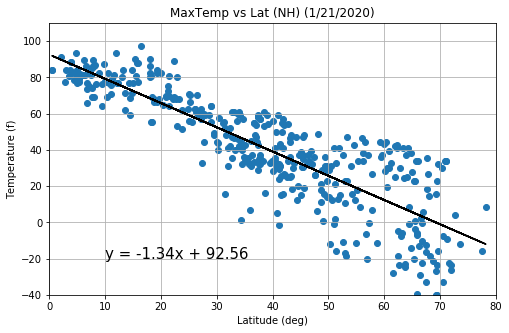

The calculated correlation coefficient: -0.8552973408757973


In [35]:
df = weatherDF[['lat(deg)','temp(f)']]
df = df[df['lat(deg)'] > 0]

fig, cc = plotter(df['lat(deg)'],df['temp(f)'],f'MaxTemp vs Lat (NH) ({formattedDate})','Latitude (deg)',
                  'Temperature (f)',(10,-20),[0,80],[-40,110])

print(f'The calculated correlation coefficient: {cc}')

fig.savefig('../output_data/tempNH.png',dpi=300)

#### Southern Hemisphere

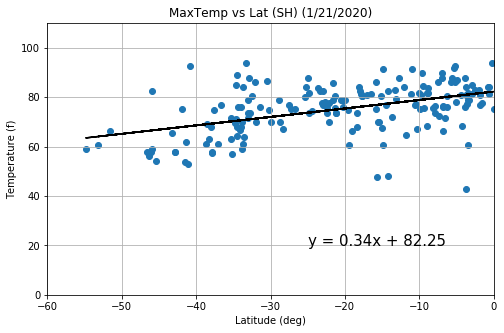

The calculated correlation coefficient: 0.46979183268296476


In [36]:
df = weatherDF[['lat(deg)','temp(f)']]
df = df[df['lat(deg)'] < 0]

fig, cc = plotter(df['lat(deg)'],df['temp(f)'],f'MaxTemp vs Lat (SH) ({formattedDate})','Latitude (deg)',
                  'Temperature (f)',(-25,20),[-60,0],[0,110])

print(f'The calculated correlation coefficient: {cc}')

fig.savefig('../output_data/tempSH.png',dpi=300)

### Analysis

Out of all the variables analyzed, max temperature is the only one to exhibit a strong sensitivity to latitude. This isn't terribly surprising, since we expect conditions to cool as we approach the poles. Still, there are a few interesting notes:

- The southern hemisphere does not exhibit the same magnitude of correlation as the northern hemisphere does. I believe this is partially due to our analysis being performed in the northern hemisphere's winter (and southern's summer). Temperature gradients tend to be maximized in the winter; thus, we should see a stronger correlation in winter than we do in summer.
- Additionally, deeper latitudes of the southern hemisphere are characterized by simply more ocean than are equivalent latitudes of the northern hemisphere. In turn, there are fewer cities closer to the poles in the southern hemisphere, causing us to lose data points that may help boost our correlation.

_____

## Humidity vs Latitude
#### Northern Hemisphere

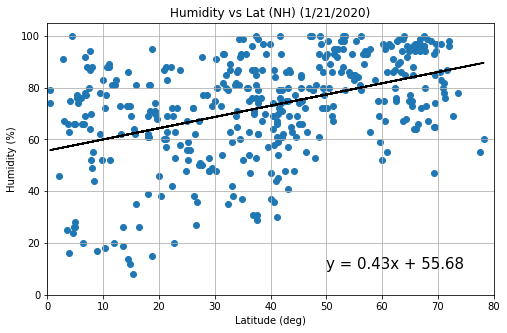

The calculated correlation coefficient: 0.4299378062936831


In [37]:
df = weatherDF[['lat(deg)','humidity(%)']]
df = df[df['lat(deg)'] > 0]

fig, cc = plotter(df['lat(deg)'],df['humidity(%)'],f'Humidity vs Lat (NH) ({formattedDate})','Latitude (deg)',
                  'Humidity (%)',(50,10),[0,80],[0,105])

print(f'The calculated correlation coefficient: {cc}')

fig.savefig('../output_data/humNH.png',dpi=300)

#### Southern Hemisphere

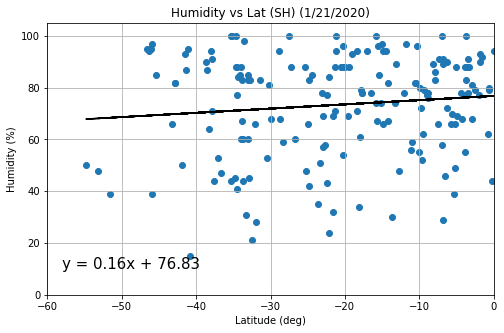

The calculated correlation coefficient: 0.1139362026684663


In [11]:
df = weatherDF[['lat(deg)','humidity(%)']]
df = df[df['lat(deg)'] < 0]

fig, cc = plotter(df['lat(deg)'],df['humidity(%)'],f'Humidity vs Lat (SH) ({formattedDate})','Latitude (deg)',
                  'Humidity (%)',(-58,10),[-60,0],[0,105])

print(f'The calculated correlation coefficient: {cc}')

fig.savefig('../output_data/humSH.png',dpi=300)

### Analysis

While not nearly as apparent as with our temperature data, humidity in the northern hemisphere at least shows some sensitivity to latitude (i.e., generally increasing humidity with latitude).

- I think once again that there is somewhat of an artifact from the seasonal influence on humidity. Stronger/more frequent storm systems, especially with latitude, in the winter time create more expansive areas of precipitation and moisture, which boosts humidity values. Conversely, a decrease in larger-scale storm systems during the summer causes the humidity/latitude correlation to nearly disappear.
- Controlling for hemisphere and then analyzing these scatterplots over numerous seasons from multiple years may show the underlying dynamics behind the differences in our current plots.

_____

## Cloud Cover vs Latitude
#### Northern Hemisphere

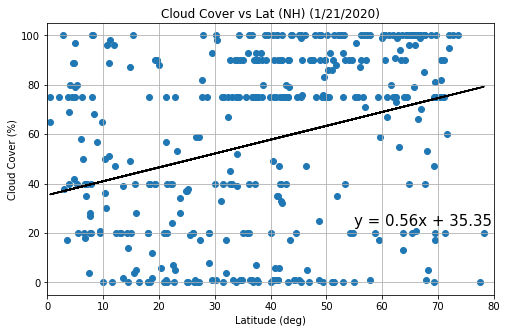

The calculated correlation coefficient: 0.3070465357217056


In [12]:
df = weatherDF[['lat(deg)','cloudcover(%)']]
df = df[df['lat(deg)'] > 0]

fig, cc = plotter(df['lat(deg)'],df['cloudcover(%)'],f'Cloud Cover vs Lat (NH) ({formattedDate})','Latitude (deg)',
                  'Cloud Cover (%)',(55,23),[0,80],[-5,105])

print(f'The calculated correlation coefficient: {cc}')

fig.savefig('../output_data/cloudNH.png',dpi=300)

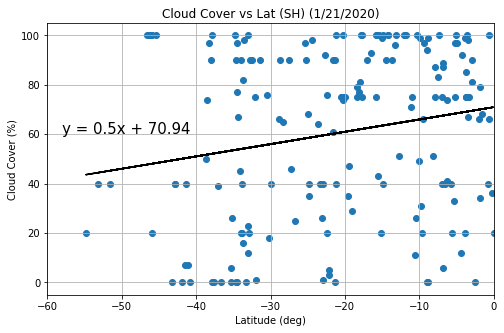

The calculated correlation coefficient: 0.1982263182002936


In [13]:
df = weatherDF[['lat(deg)','cloudcover(%)']]
df = df[df['lat(deg)'] < 0]

fig, cc = plotter(df['lat(deg)'],df['cloudcover(%)'],f'Cloud Cover vs Lat (SH) ({formattedDate})','Latitude (deg)',
                  'Cloud Cover (%)',(-58,60),[-60,0],[-5,105])

print(f'The calculated correlation coefficient: {cc}')

fig.savefig('../output_data/cloudSH.png',dpi=300)

### Analysis

Our correlation values continue to be weak with cloud cover vs latitude. With that said, we see some of the same influences caused by the different seasons (at least I suspect we do).

- With increasing and decreasing latitude in the northern and southern hemispheres, respectively, there is a weak signal that cloud cover generally increases towards the poles. This signal is a touch stronger in the NH, which agrees with winter's influence of more widespread storms and cloud cover, especially towards the poles. We would expect that this hemispheric (i.e., seasonal) trend in clouds/latitude correlation would match our trend in humidity/latitude correlation.
- Another interesting aspect of this plot is the "clustering" of data points along lines of equal cloud cover percentage. I'm pretty sure this is an artifact of the categorical manner in which cloud cover is reported in many locations: Sunny/Clear, Mostly Sunny/Clear, etc. These categories are mapped to static percentages: Clear = 0%, Mostly Sunny = 20%, etc. Such reporting obviously influences our analysis of correlation.

_____

## Wind Speed vs Latitude
#### Northern Hemisphere

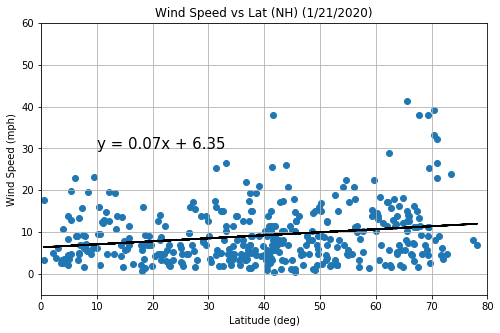

The calculated correlation coefficient: 0.2096204755266641


In [41]:
df = weatherDF[['lat(deg)','wind(mph)']]
df = df[df['lat(deg)'] > 0]

fig, cc = plotter(df['lat(deg)'],df['wind(mph)'],f'Wind Speed vs Lat (NH) ({formattedDate})','Latitude (deg)',
                  'Wind Speed (mph)',(10,30),[0,80],[-5, 60])

print(f'The calculated correlation coefficient: {cc}')

fig.savefig('../output_data/windNH.png',dpi=300)

#### Southern Hemisphere

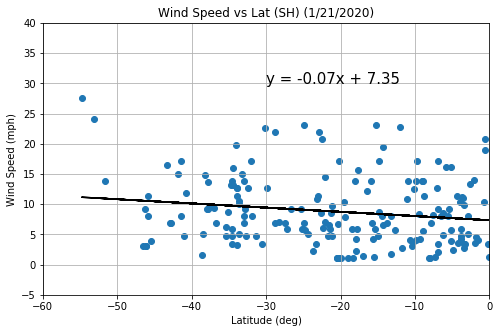

The calculated correlation coefficient: -0.1671442844894094


In [42]:
df = weatherDF[['lat(deg)','wind(mph)']]
df = df[df['lat(deg)'] < 0]

fig, cc = plotter(df['lat(deg)'],df['wind(mph)'],f'Wind Speed vs Lat (SH) ({formattedDate})','Latitude (deg)',
                  'Wind Speed (mph)',(-30,30),[-60,0],[-5, 40])

print(f'The calculated correlation coefficient: {cc}')

fig.savefig('../output_data/windSH.png',dpi=300)